## Name : Vansh Kolte
## Rollno:62
## Batch : C4
## Practical: 8

#### AIM :
#### Create a machine learning model to predict whether a person suffer from heart attack or not.
### - Perform the EDA
### - Apply logistic regression
### - Apply Decision tree algorithm
### - Apply KNN
### - Apply Naive Bayes (NB), Support Vector Machine (SVM)
### - Apply Random Forest (RF), and AdaBoost.
### - Evaluate the performance using Precision, Recall, F1 score and accuracy.


In [1]:
# Import necessary libraries for data manipulation and to suppress warnings
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore")

## EDA

In [2]:
# Load the heart dataset into a pandas DataFrame and display the first few rows
hd = pd.read_excel("heart.xlsx")
hd.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
hd.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# Display information about the dataset, including column data types and non-null counts
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
hd.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
hd.shape

(303, 14)

In [7]:
## finding the missing values 
miss = hd.isnull().sum()
miss

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
hd.duplicated().sum()

1

In [9]:
hd.drop_duplicates(inplace = True)

<Axes: xlabel='oldpeak', ylabel='Count'>

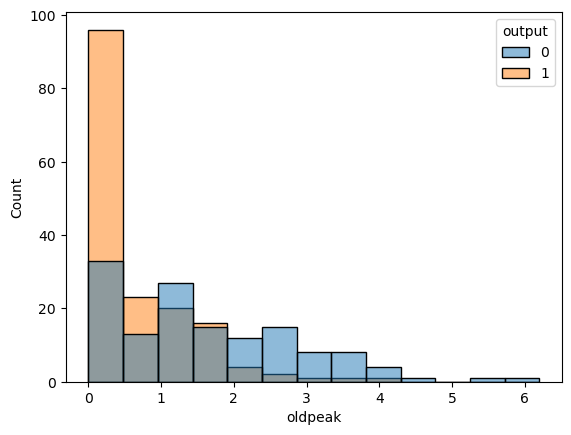

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
## data visualization
sns.histplot(x='oldpeak',hue='output',data=hd)

<Axes: xlabel='age', ylabel='Count'>

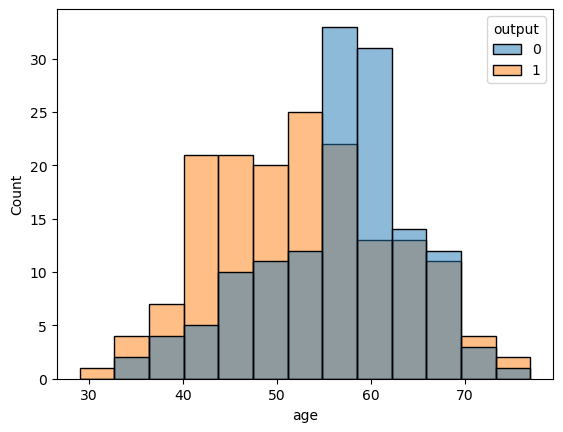

In [11]:
sns.histplot(x='age',hue='output',data=hd)

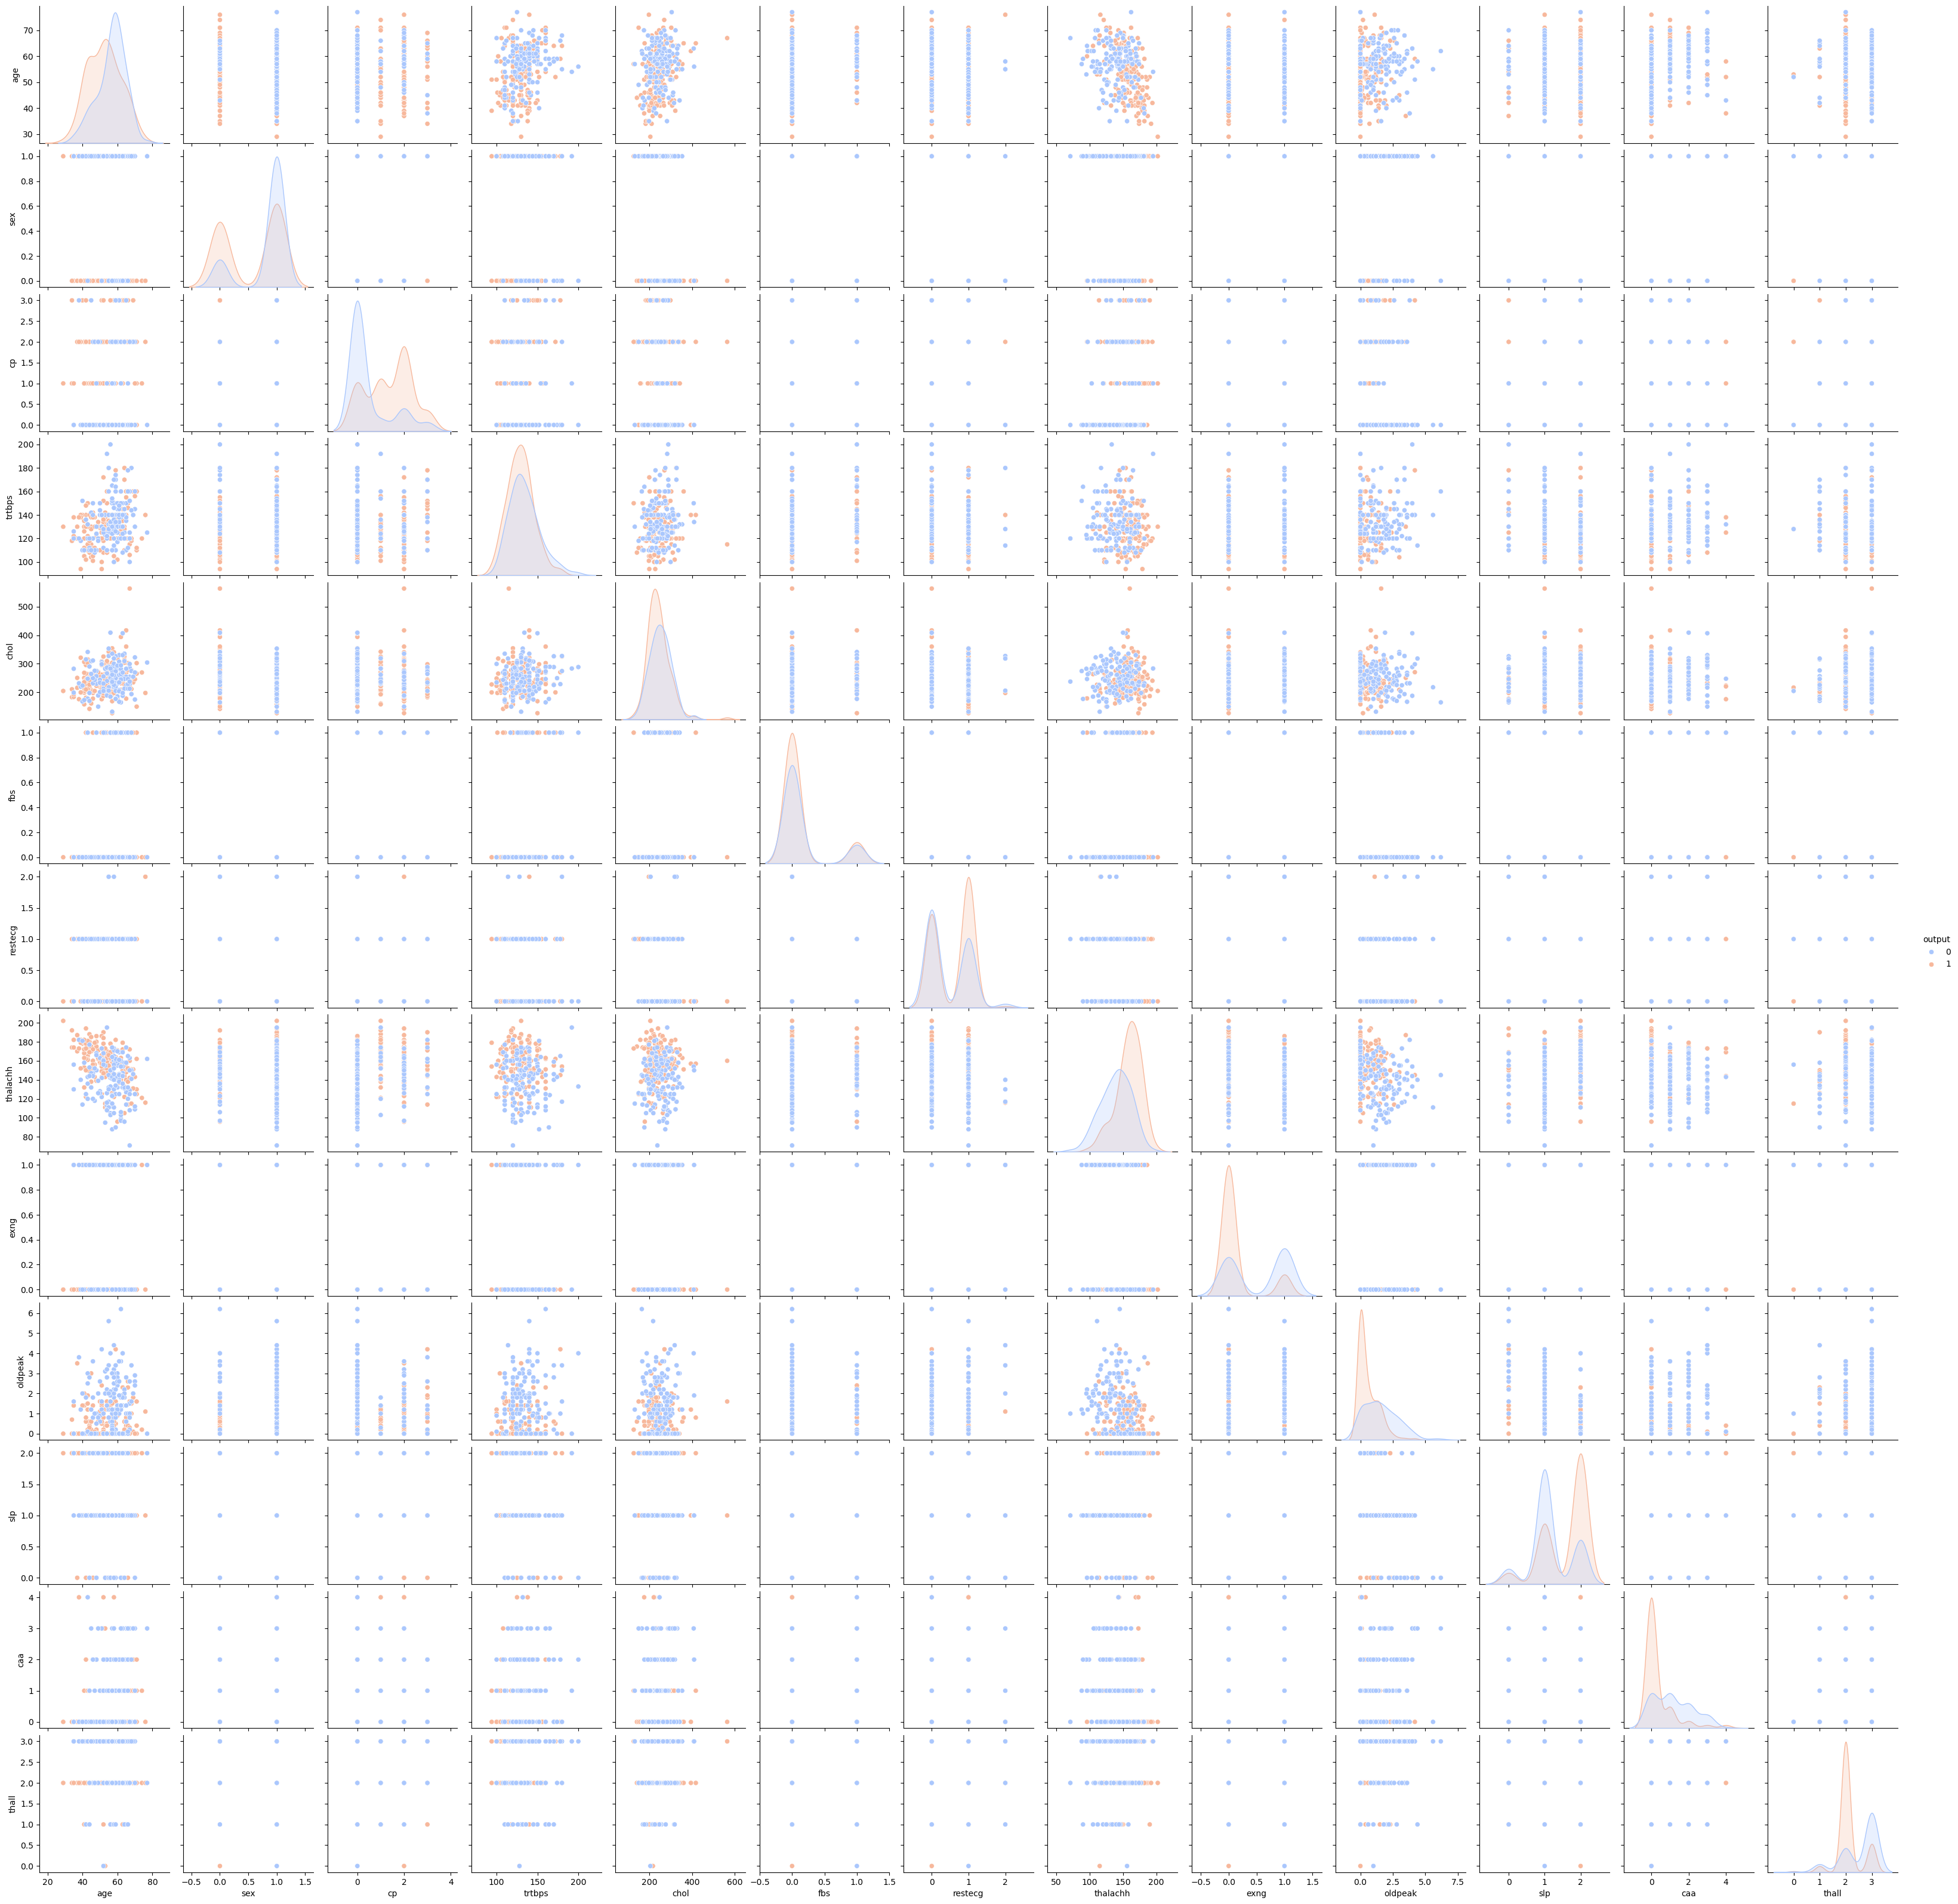

In [12]:
sns.pairplot(hd, hue='output', palette='coolwarm', diag_kind='kde')

# Show the plot
plt.show()

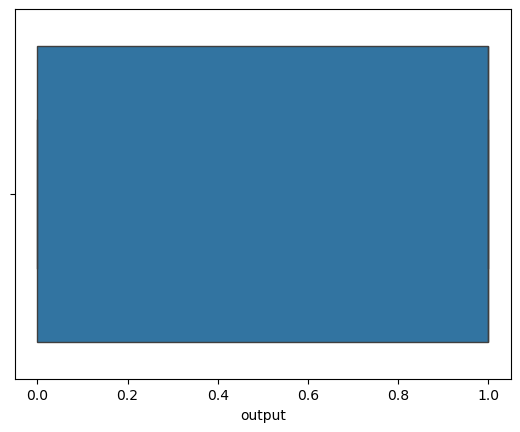

In [13]:
## OUTLIERS

sns.boxplot(x=hd['output'])
plt.show()

In [14]:
## # separating the data and label
X = hd.drop(columns=['output'],axis=1)
Y = hd['output']

In [15]:
print(X)
print(Y)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [16]:
# Split the dataset into training and testing sets
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(302, 13) (211, 13) (91, 13)


## Navies Bayes classifier

In [18]:
# Apply Naive Bayes (GaussianNB) Classifier and fit the model to the training data
## Navies Bayes classifier

from sklearn.naive_bayes import GaussianNB

g = GaussianNB()

In [19]:
g.fit(X_train ,Y_train)

GaussianNB()

In [20]:
## test perdiction
pre = g.predict(X_test)
pre

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, pre)

0.8461538461538461

In [22]:
# Evaluate the performance of the model using classification metrics
from sklearn import metrics
nb_metrics = print(metrics.classification_report(Y_test,pre))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        42
           1       0.89      0.82      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [23]:
# Apply Naive Bayes (GaussianNB) Classifier and fit the model to the training data
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the parameter grid
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform grid search with cross-validation
grid_search_nb = GridSearchCV(estimator=nb_classifier, param_grid=param_grid_nb, 
                              cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search_nb.fit(X_train, Y_train)

# Best parameters
print(f"Best parameters for Naive Bayes: {grid_search_nb.best_params_}")

# Predict using the best model
y_pred_best_nb = grid_search_nb.best_estimator_.predict(X_test)

accuracy_score(Y_test,y_pred_best_nb)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Naive Bayes: {'var_smoothing': 1e-05}


0.8571428571428571

## SVM Algo

In [23]:
# Apply Support Vector Machine (SVM) Classifier and fit the model to the training data
from sklearn.svm import SVC

s= SVC()

In [24]:
s.fit(X_train ,Y_train)

SVC()

In [25]:
## test perdiction
pres = s.predict(X_test)
pres

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [26]:
accuracy_score(Y_test, pres)

0.7142857142857143

In [27]:
# Evaluate the performance of the model using classification metrics
from sklearn import metrics
svm_metrics = print(metrics.classification_report(Y_test,pres))

              precision    recall  f1-score   support

           0       0.77      0.55      0.64        42
           1       0.69      0.86      0.76        49

    accuracy                           0.71        91
   macro avg       0.73      0.70      0.70        91
weighted avg       0.72      0.71      0.71        91



## HyperTuning In SVM Model

In [29]:
# Apply Support Vector Machine (SVM) Classifier and fit the model to the training data
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Hyperparameter tuning for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, Y_train)

# Get best parameters and retrain SVM
best_svm = grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

# Evaluate tuned SVM performance
accuracy_score(Y_test, y_pred_best_svm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, ke

0.8351648351648352

## LogisticRegression

In [28]:
# Apply Logistic Regression and fit the model to the training data
from sklearn.linear_model import LogisticRegression

In [29]:
# Apply Logistic Regression and fit the model to the training data
Lr = LogisticRegression()

In [30]:
Lr.fit(X_train, Y_train)

LogisticRegression()

In [31]:
preLr = Lr.predict(X_test)
preLr

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [32]:
accuracy_score(Y_test, preLr)

0.8241758241758241

In [33]:
# Evaluate the performance of the model using classification metrics
log_reg_metrics = print(metrics.classification_report(Y_test,preLr))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



## DecisionTreeClassifier

In [34]:
# Apply Decision Tree Classifier and fit the model to the training data
from sklearn.tree import DecisionTreeClassifier


In [35]:
# Apply Decision Tree Classifier and fit the model to the training data
dc = DecisionTreeClassifier()

In [36]:
dc.fit(X_train , Y_train)

DecisionTreeClassifier()

In [37]:
predc = dc.predict(X_test)
predc

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [38]:
# Evaluate the performance of the model using classification metrics
dtc_metrics = print(metrics.classification_report(Y_test,predc))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [39]:
accuracy_score(Y_test,predc)

0.8131868131868132

## KNN

In [40]:
# Apply K-Nearest Neighbors (KNN) Classifier and fit the model to the training data
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Apply K-Nearest Neighbors (KNN) Classifier and fit the model to the training data
knn = KNeighborsClassifier(n_neighbors=37)

In [42]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=37)

In [43]:
preknn = knn.predict(X_test)
preknn

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0], dtype=int64)

In [44]:
# Evaluate the performance of the model using classification metrics
knn_metrics = print(metrics.classification_report(Y_test,predc))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [45]:
# Apply K-Nearest Neighbors (KNN) Classifier and fit the model to the training data
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    predar = knn.predict(X_test)
    score = accuracy_score(Y_test,predar)
    accuracy_rate.append(score)
    

In [100]:
accuracy_rate

[0.5714285714285714,
 0.5934065934065934,
 0.6483516483516484,
 0.6483516483516484,
 0.6813186813186813,
 0.6923076923076923,
 0.6923076923076923,
 0.7142857142857143,
 0.6483516483516484,
 0.6593406593406593,
 0.6813186813186813,
 0.6373626373626373,
 0.6593406593406593,
 0.6153846153846154,
 0.6483516483516484,
 0.6593406593406593,
 0.6593406593406593,
 0.6263736263736264,
 0.6373626373626373,
 0.6373626373626373,
 0.6813186813186813,
 0.6483516483516484,
 0.6923076923076923,
 0.6813186813186813,
 0.7142857142857143,
 0.6923076923076923,
 0.6703296703296703,
 0.6813186813186813,
 0.6703296703296703,
 0.6593406593406593,
 0.6813186813186813,
 0.6703296703296703,
 0.6703296703296703,
 0.6813186813186813,
 0.6813186813186813,
 0.6923076923076923,
 0.6813186813186813,
 0.6923076923076923,
 0.7032967032967034]

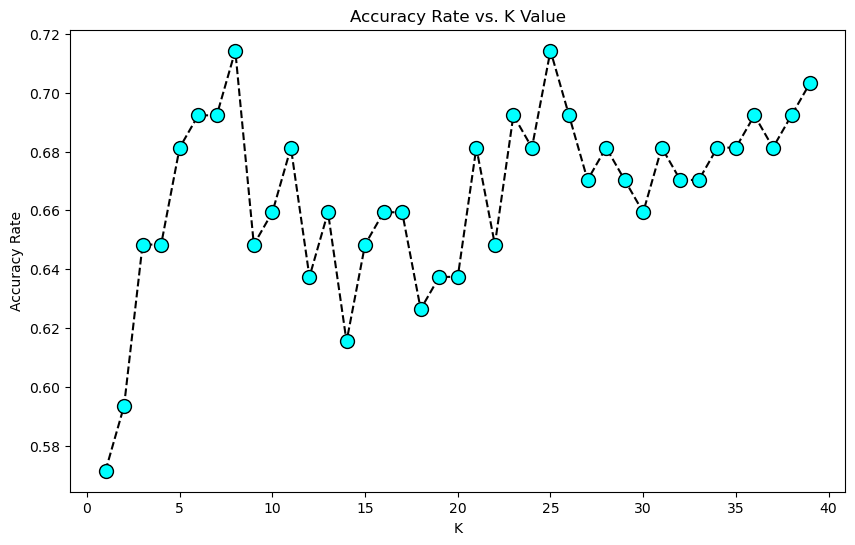

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='aqua', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

## RandomForestClassifier

In [47]:
# Apply Random Forest Classifier and fit the model to the training data
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()

In [48]:
Rf.fit(X_train ,Y_train)

RandomForestClassifier()

In [49]:
prerf = Rf.predict(X_test)
prerf

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [50]:
# Evaluate the performance of the model using classification metrics
rf_metrics = print(metrics.classification_report(Y_test,predc))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [106]:
# Define hyperparameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=Rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'bootstrap': False, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.8481556002682763


# AdaBoostClassifier

In [51]:
# Apply AdaBoost Classifier and fit the model to the training data
from sklearn.ensemble import AdaBoostClassifier

Ad = AdaBoostClassifier()

In [52]:
Ad.fit(X_train,Y_train)

AdaBoostClassifier()

In [53]:
preAd = Rf.predict(X_test)
preAd

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [54]:
# Evaluate the performance of the model using classification metrics
ada_metrics = print(metrics.classification_report(Y_test,preAd))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        42
           1       0.85      0.84      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



In [57]:
# Define hyperparameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],    
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=Ad, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_adb = grid_search.best_estimator_

y_pred = best_adb.predict(X_test) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best Score: 0.8339369550637157
